# Import data

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import numpy as np

def column_df_to_row(column_df):
    return column_df.to_numpy()[:, 0]
def np_back_to_df(original_df, array):
    return pd.DataFrame(array, index=original_df.index, columns=original_df.columns)
input_path = "all_seasons.csv"
output_prefix = "all_seasons_"
main_data = pd.read_csv(input_path) 
label_column = 'ttl_pts'

print("Shape: ", main_data.shape)

main_input = main_data.loc[:, main_data.columns != label_column]
main_output = main_data[[label_column]]

Shape:  (24154, 103)


# Divide into training and testing
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [107]:
init_train, init_test, init_train_label, init_test_label = train_test_split(main_input, main_output, test_size=.3, random_state=42)
print("Training shape: ", init_train.shape)
print("Testing shape: ", init_test.shape)

Training shape:  (16907, 102)
Testing shape:  (7247, 102)


# Describe training data
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


,a_ast,a_ast_pct,a_blk,a_blk_pct,a_def_reb_pct,a_def_rtg,a_efg,a_fg,a_fg3,a_fg3_pct,...,h_pace,h_pf,h_pts,h_stl,h_stl_pct,h_to,h_to_pct,h_trb,h_trb_pct,h_ts_pct
count,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,...,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000,16907.000000
mean,21.518664,58.317971,5.019749,7.963569,73.655268,106.023607,0.489497,36.850027,6.771546,0.349891,...,92.629713,21.608773,98.951700,7.656017,8.189821,14.290448,13.335691,42.601288,50.023322,0.532384
std,2.287736,4.669344,1.029429,1.542354,3.089543,4.348276,0.030111,2.386247,2.385568,0.035852,...,3.670409,2.075287,6.542577,1.140218,1.171975,1.492319,1.319337,2.470095,1.881319,0.028507
min,9.000000,25.700000,0.000000,0.000000,53.800000,71.900000,0.310000,23.000000,0.000000,0.000000,...,78.100000,11.000000,66.000000,2.000000,1.900000,8.000000,7.300000,29.000000,36.300000,0.380000
25%,20.060000,55.380000,4.330000,6.920000,71.650000,103.420000,0.470000,35.395000,5.000000,0.330000,...,90.050000,20.240000,94.690000,6.910000,7.440000,13.350000,12.480000,41.010000,48.840000,0.520000
50%,21.370000,58.170000,4.970000,7.930000,73.630000,106.290000,0.490000,36.700000,6.430000,0.350000,...,92.150000,21.450000,98.400000,7.560000,8.120000,14.190000,13.280000,42.420000,50.050000,0.530000
75%,22.910000,61.220000,5.630000,8.910000,75.610000,108.890000,0.510000,38.350000,8.290000,0.370000,...,94.790000,22.880000,102.810000,8.345000,8.910000,15.120000,14.120000,44.030000,51.260000,0.550000
max,36.000000,81.300000,15.000000,20.250000,94.100000,137.400000,0.620000,52.000000,17.000000,0.770000,...,113.500000,39.000000,140.000000,18.000000,17.400000,26.000000,22.900000,66.000000,67.900000,0.700000


,ttl_pts
count,16907.000000
mean,199.335187
std,21.573177
min,121.000000
25%,184.000000
50%,198.000000
75%,213.000000
max,301.000000


<AxesSubplot:xlabel='ttl_pts', ylabel='Count'>

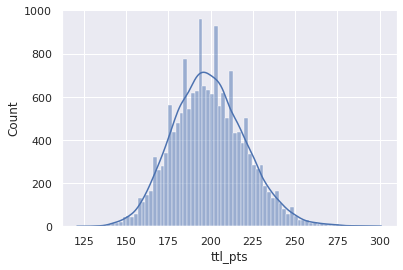

<AxesSubplot:xlabel='ttl_pts'>

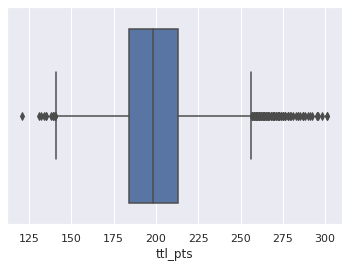

In [108]:
display(init_train.describe())
display(init_train_label.describe())
display(sns.histplot(init_train_label, x="ttl_pts", kde=True))
plt.show()
display(sns.boxplot(x="ttl_pts", data=init_train_label))

## Removing Outliers

<AxesSubplot:xlabel='ttl_pts', ylabel='Count'>

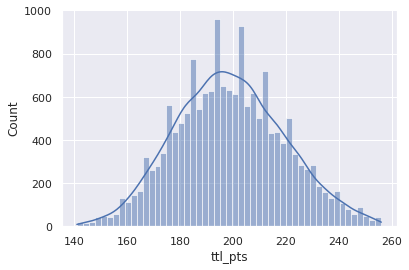

<AxesSubplot:xlabel='ttl_pts'>

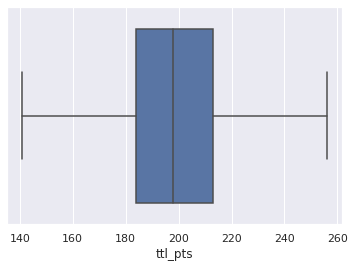

In [109]:
def remove_outliers_by_iqr(data, labels):
    lower = labels.quantile(.25)
    upper = labels.quantile(.75)
    diff = upper - lower
    
    lower_bound = lower - 1.5 * diff
    upper_bound = upper + 1.5 * diff
    valid = (labels >= lower_bound) & (labels <= upper_bound)
    rows_to_select = valid.to_numpy()[:, 0]
    input, labels = data.loc[rows_to_select], labels.loc[rows_to_select]
    input.sort_index(axis=0)
    labels.sort_index(axis=0)
    return input, labels

init_train, init_train_label = remove_outliers_by_iqr(init_train, init_train_label)

display(sns.histplot(init_train_label, x="ttl_pts", kde=True))
plt.show()
display(sns.boxplot(x="ttl_pts", data=init_train_label))

# Standardize data
https://scikit-learn.org/stable/modules/preprocessing.html

Then describe training data again

In [110]:
def scale_dataframe(df):
    scaled_values = preprocessing.scale(df)
    return np_back_to_df(df, scaled_values)
scaled_train = scale_dataframe(init_train)
scaled_test = scale_dataframe(init_test)

display(scaled_train.describe())
display(scaled_train.head())

,a_ast,a_ast_pct,a_blk,a_blk_pct,a_def_reb_pct,a_def_rtg,a_efg,a_fg,a_fg3,a_fg3_pct,...,h_pace,h_pf,h_pts,h_stl,h_stl_pct,h_to,h_to_pct,h_trb,h_trb_pct,h_ts_pct
count,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,...,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04,1.675500e+04
mean,1.542054e-15,1.060195e-16,-6.233947e-16,8.533775e-16,-1.058711e-15,2.853515e-15,-2.714099e-15,1.379102e-15,3.244197e-16,-1.614677e-15,...,9.594235e-16,1.012698e-15,-2.670843e-15,-6.021908e-17,-6.070147e-16,1.975143e-16,-5.672044e-16,-1.459677e-15,1.153916e-15,7.041816e-16
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,...,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-5.476178e+00,-6.981898e+00,-4.878284e+00,-5.169093e+00,-6.430253e+00,-7.876761e+00,-5.973940e+00,-5.838436e+00,-2.846824e+00,-9.746623e+00,...,-3.984128e+00,-5.111461e+00,-5.077931e+00,-4.959524e+00,-5.367864e+00,-4.211108e+00,-4.576373e+00,-5.514075e+00,-7.306385e+00,-5.354133e+00
25%,-6.390177e-01,-6.278263e-01,-6.704611e-01,-6.762882e-01,-6.475003e-01,-5.980036e-01,-6.443499e-01,-6.123415e-01,-7.393450e-01,-5.535951e-01,...,-7.022250e-01,-6.587693e-01,-6.512101e-01,-6.529269e-01,-6.324790e-01,-6.292608e-01,-6.510800e-01,-6.417342e-01,-6.311475e-01,-4.313158e-01
50%,-6.556249e-02,-3.072769e-02,-4.851958e-02,-2.054658e-02,-9.291794e-03,6.265163e-02,2.184877e-02,-5.933795e-02,-1.408209e-01,3.558066e-03,...,-1.305032e-01,-8.049757e-02,-8.146474e-02,-8.280720e-02,-6.081992e-02,-6.687729e-02,-3.727927e-02,-7.376784e-02,1.295444e-02,-7.968597e-02
75%,6.085757e-01,6.198744e-01,6.025755e-01,6.157176e-01,6.321564e-01,6.609373e-01,6.880475e-01,6.329718e-01,6.389465e-01,5.607112e-01,...,5.896464e-01,6.134285e-01,5.917304e-01,6.013365e-01,6.132259e-01,5.557616e-01,5.916770e-01,5.753366e-01,6.570564e-01,6.235737e-01
max,6.343128e+00,4.917273e+00,9.698470e+00,7.978203e+00,6.625485e+00,7.253630e+00,4.352140e+00,6.403627e+00,4.318605e+00,1.170377e+01,...,5.746137e+00,8.381545e+00,5.112637e+00,9.074193e+00,7.857085e+00,7.839967e+00,7.244973e+00,9.496466e+00,9.514788e+00,5.898021e+00


,a_ast,a_ast_pct,a_blk,a_blk_pct,a_def_reb_pct,a_def_rtg,a_efg,a_fg,a_fg3,a_fg3_pct,...,h_pace,h_pf,h_pts,h_stl,h_stl_pct,h_to,h_to_pct,h_trb,h_trb_pct,h_ts_pct
20721,-1.584562,-1.792062,0.038941,0.394973,1.847020,-0.750463,0.354948,-0.401271,0.740105,-0.553595,...,0.647368,0.097803,0.644227,0.566252,0.416985,0.000073,-0.188835,-0.317182,0.209911,0.271944
8165,-0.157490,0.123362,-1.545066,-1.533297,0.444257,0.254380,0.021849,-0.435043,-0.465373,1.117864,...,-1.678000,0.377301,-1.603874,-1.240589,-0.871381,-0.502055,0.144588,-1.761439,-1.243310,-0.782946
13175,0.021988,-0.409532,-1.020303,-1.208673,-0.407767,1.122934,0.688047,0.565429,0.866554,-0.275019,...,0.666609,-0.441917,1.783718,-1.722998,-1.869652,0.060328,-0.067590,0.230500,0.215234,2.381723
7163,0.148936,-0.144155,0.748343,0.518330,0.214243,-0.526394,0.688047,0.396573,-0.397933,0.282135,...,0.427475,0.965210,0.094554,0.057530,-0.043755,0.910599,0.697766,0.433345,0.492039,-0.079686
16741,-0.516447,-0.278984,-0.184569,-0.260769,0.104096,0.293650,0.354948,-0.460371,0.386049,-0.275019,...,-0.748952,0.449585,-0.325421,-0.337168,-0.188803,-0.743077,-0.544991,-1.023083,-0.572593,-0.431316


# Correlation Heatmap
https://seaborn.pydata.org/generated/seaborn.heatmap.html

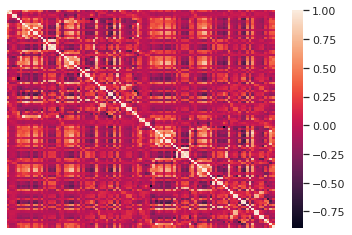

In [111]:
def plot_correlation_heatmap(input, labels, ax=None, annot=False, ticks='auto' ):
    merged = pd.concat([input, init_train_label], axis=1)
    sns.heatmap(merged.corr(method='pearson'), ax=ax, annot=annot, xticklabels=ticks, yticklabels=ticks)
plot_correlation_heatmap(scaled_train, init_train_label, ticks=False)

# Feature selection
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

,a_fg,a_fga,a_opp_fg,a_opp_fg3,a_opp_fg3a,a_opp_fga,a_opp_pts,a_pace,a_pts,h_fg,h_fg3,h_fg3a,h_fga,h_opp_fg,h_opp_fg3,h_opp_fg3a,h_opp_fga,h_opp_pts,h_pace,h_pts
20721,-0.401271,-0.890448,-0.839252,0.502315,0.595996,-0.006439,-0.877945,-0.446839,-0.203112,0.236498,0.708680,0.715789,0.355730,0.392503,0.736795,1.030159,-0.510265,0.832106,0.647368,0.644227
8165,-0.435043,-0.566866,-0.429537,-0.424124,-0.460779,-1.068675,-0.210034,-0.629856,-0.355062,-1.148126,-1.075775,-1.139653,-1.415566,-0.073485,-0.452684,-0.625059,-0.777908,-0.273839,-1.678000,-1.603874
13175,0.565429,0.511741,1.367527,-0.139820,-0.040282,0.500823,0.958811,0.233330,0.437248,1.654586,0.809925,0.366189,0.272005,1.185500,0.085763,0.047719,1.418787,1.145139,0.666609,1.783718
7163,0.396573,-1.169308,-0.782460,-0.674116,-0.667339,-0.084286,-0.618732,-0.687220,0.426395,0.064989,-1.189676,-1.267947,-0.159699,0.314839,-0.643588,-0.612157,0.305290,0.476170,0.427475,0.094554
16741,-0.460371,-0.645789,0.199232,-0.169231,-0.320613,-0.340428,-0.626683,-1.304561,-0.327153,-0.252931,0.054802,0.180164,-0.117837,-0.236989,-0.056191,-0.131074,-0.762759,0.010592,-0.748952,-0.325421


,a_fg,a_fg3a,a_fga,a_opp_fg,a_opp_fg3,a_opp_fg3a,a_opp_fga,a_opp_pts,a_pace,a_pts,h_fg,h_fg3,h_fg3a,h_opp_fg,h_opp_fg3,h_opp_fg3a,h_opp_fga,h_opp_pts,h_pace,h_pts
20721,-0.401271,1.038174,-0.890448,-0.839252,0.502315,0.595996,-0.006439,-0.877945,-0.446839,-0.203112,0.236498,0.708680,0.715789,0.392503,0.736795,1.030159,-0.510265,0.832106,0.647368,0.644227
8165,-0.435043,-0.622282,-0.566866,-0.429537,-0.424124,-0.460779,-1.068675,-0.210034,-0.629856,-0.355062,-1.148126,-1.075775,-1.139653,-0.073485,-0.452684,-0.625059,-0.777908,-0.273839,-1.678000,-1.603874
13175,0.565429,1.097362,0.511741,1.367527,-0.139820,-0.040282,0.500823,0.958811,0.233330,0.437248,1.654586,0.809925,0.366189,1.185500,0.085763,0.047719,1.418787,1.145139,0.666609,1.783718
7163,0.396573,-0.599887,-1.169308,-0.782460,-0.674116,-0.667339,-0.084286,-0.618732,-0.687220,0.426395,0.064989,-1.189676,-1.267947,0.314839,-0.643588,-0.612157,0.305290,0.476170,0.427475,0.094554
16741,-0.460371,0.387109,-0.645789,0.199232,-0.169231,-0.320613,-0.340428,-0.626683,-1.304561,-0.327153,-0.252931,0.054802,0.180164,-0.236989,-0.056191,-0.131074,-0.762759,0.010592,-0.748952,-0.325421


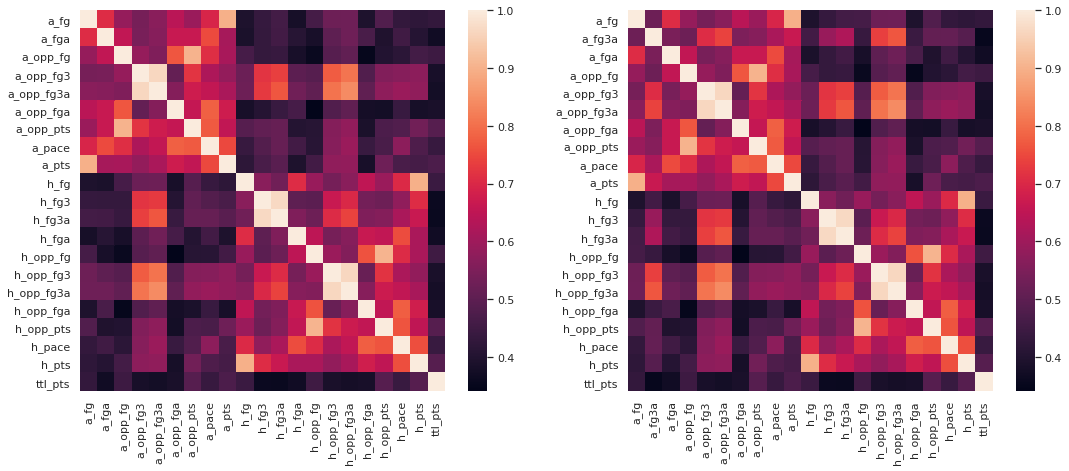

In [112]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

def select_features(input, labels, method, k=20, ax=None):
    selector = SelectKBest(method, k=k)
    selector.fit(input, column_df_to_row(labels))
    selected = input.loc[:, selector.get_support()]
    display(selected.head())
    plot_correlation_heatmap(selected, labels, ax=ax)
    return selected
figure = plt.figure(figsize = (18,7))
ax1, ax2 = figure.subplots(1,2)
f_regression_select = select_features(scaled_train, init_train_label, f_regression, k=20, ax=ax1)
mutual_info_regression_select = select_features(scaled_train, init_train_label, mutual_info_regression, k=20, ax=ax2)

In [113]:
f_regression_columns = set(f_regression_select.columns)
mutual_info_columns = set(mutual_info_regression_select.columns)
display(f"Column diff {(f_regression_columns - mutual_info_columns) | (mutual_info_columns - f_regression_columns)}")

"Column diff {'a_fg3a', 'h_fga'}"

## Removing redundant features
- Removing ft, ft_rt, fta (in favor of only fa_per_fga_pct)
- Removing orb in favor of only orb_pct)
- Removing stl (in favor of stl_pct)
- Removing opp_fg3a (in favor of opp_fg3)
- Removing opp_tov (in favor of opp_tov_pct)

Columns before removal: {'h_fg3', 'a_opp_pts', 'a_pace', 'h_fg3a', 'h_opp_pts', 'h_opp_fg3', 'a_fg', 'a_opp_fg3', 'a_opp_fg', 'a_opp_fg3a', 'h_fga', 'a_opp_fga', 'a_fga', 'h_opp_fg3a', 'h_pace', 'h_opp_fg', 'h_fg', 'a_pts', 'h_pts', 'h_opp_fga'}
Columns after removal: {'h_fg3', 'a_opp_pts', 'a_pace', 'h_fg3a', 'h_opp_pts', 'h_opp_fg3', 'a_fg', 'a_opp_fg3', 'a_opp_fg', 'a_opp_fg3a', 'h_fga', 'a_opp_fga', 'a_fga', 'h_opp_fg3a', 'h_pace', 'h_opp_fg', 'h_fg', 'a_pts', 'h_pts', 'h_opp_fga'}


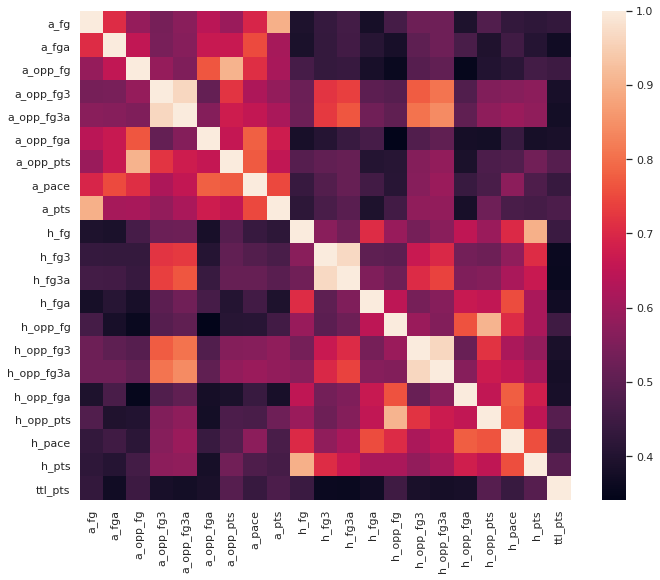

In [114]:
print(f"Columns before removal: {set(f_regression_select.columns)}")
columns_to_drop = ['ft', 'ft_rt', 'fta', 'orb_pct', 'stl', 'opp_fg3a', 'opp_tov', 'trb', 'to']
def attempt_to_drop_columns(df, columns):
    for column in columns:
        try:
            df = df.drop(labels=[column], axis=1)
        except KeyError as error:
            continue
    return df

f_regression_select = attempt_to_drop_columns(f_regression_select, columns_to_drop)
print(f"Columns after removal: {set(f_regression_select.columns)}")
figure = plt.figure(figsize = (11,9))
plot_correlation_heatmap(f_regression_select, init_train_label, ax=figure.gca())

# Keeping the final features
test_select = scaled_test[f_regression_select.columns]

## Looking at the relationship between some features and our target label

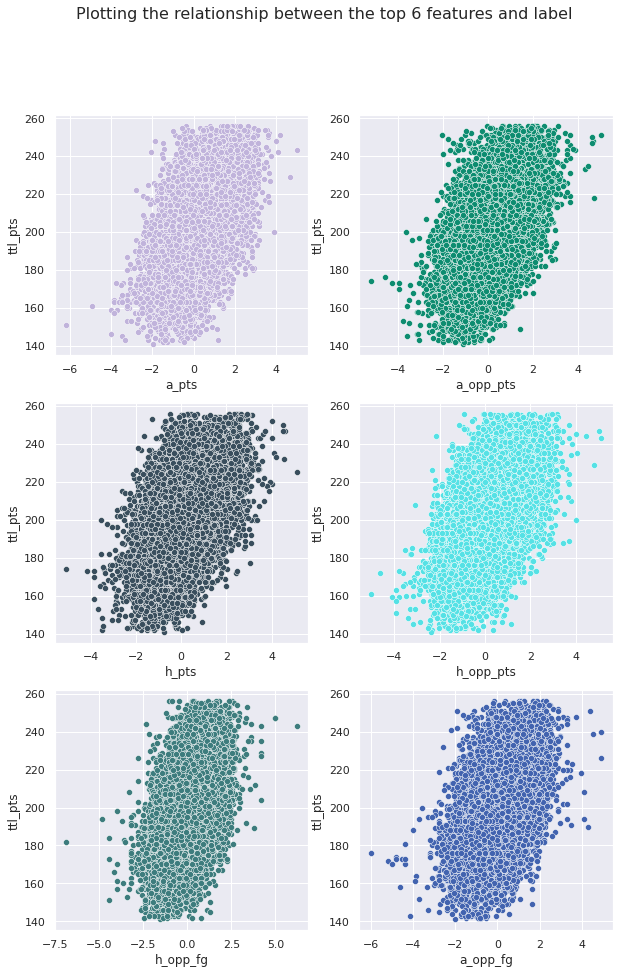

In [115]:
k = 6
selector = SelectKBest(f_regression, k=k)
selector.fit(f_regression_select, column_df_to_row(init_train_label))
features_to_view = f_regression_select.loc[:, selector.get_support()]
fig, axs = plt.subplots(k // 2, 2, figsize=(10, 15))
row_index = 0
column_index = 0
for column in set(features_to_view.columns):
    x = features_to_view[column]
    sns.scatterplot(x=x, y=init_train_label['ttl_pts'], ax = axs[row_index, column_index], color=np.random.rand(3))
    column_index = column_index + 1
    if column_index == 2:
        column_index = 0
        row_index = row_index + 1
fig.suptitle(f"Plotting the relationship between the top {k} features and label", fontsize=16)
plt.show()


# Dimensionality Reduction with PCA
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

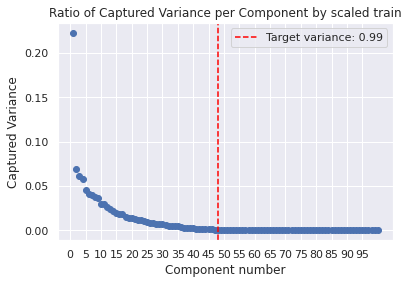

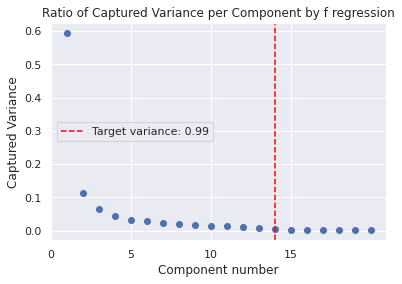

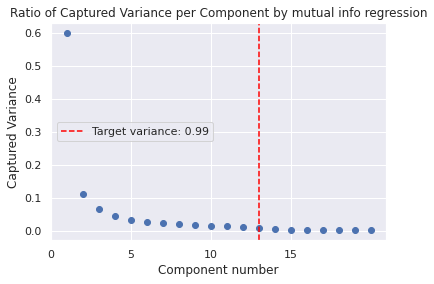

In [116]:
from sklearn.decomposition import PCA

def pca_scree_plot(X, label, max_components=100, target_variance=None):
    max_components = min(X.shape[1], max_components)
    pca = PCA(n_components=max_components)
    pca.fit(X)
    component_numbers = np.arange(1, max_components + 1)
    
    explained_variance = 0
    component_number = -1
    while target_variance and explained_variance < target_variance:
        component_number += 1
        explained_variance += pca.explained_variance_ratio_[component_number]
    
    plt.scatter(component_numbers, pca.explained_variance_ratio_)
    plt.xticks(range(0, max_components, 5))
    if target_variance:
        plt.axvline(x=component_number, linestyle='--', color='red', label=f"Target variance: {target_variance}")
    plt.xlabel('Component number')
    plt.ylabel('Captured Variance')
    plt.legend()
    plt.title(f"Ratio of Captured Variance per Component by {label}")
max_components = 20
pca_scree_plot(scaled_train, max_components = 100, label='scaled train', target_variance=.99)
plt.show()
pca_scree_plot(f_regression_select, max_components = max_components, label='f regression', target_variance=.99)
plt.show()
pca_scree_plot(mutual_info_regression_select, max_components = max_components, label='mutual info regression', target_variance=.99)



## Apply PCA and Export
Apply PCA of only 10 components to train and test

In [117]:
def export_dataset(name, input, labels):
    if input.shape[0] != labels.shape[0]:
        raise ValueError(f'Trying to merge incompatible datsets: {input.shape} ; {labels.shape}')
    output = pd.concat([input, labels], axis=1)
    if output.shape[0] != input.shape[0]:
        raise ValueError(f'An error occurred while merging the datasets')
    output.to_csv(path_or_buf=f'output-datasets/{output_prefix}{name}.csv', index=False)
    

pca = PCA(n_components=10)
pca.fit(f_regression_select)

train_pca = pd.DataFrame(data=pca.transform(f_regression_select), index=f_regression_select.index)
test_pca = pd.DataFrame(data=pca.transform(test_select), index=test_select.index)

# # scaled datsets
export_dataset('scaled-train', scaled_train, init_train_label)
export_dataset('scaled-test', scaled_test, init_test_label)

# features selected datsets
export_dataset('feature-selected-train', f_regression_select, init_train_label)
export_dataset('feature-selected-test', test_select, init_test_label)

# pca datasets
export_dataset('pca-train', train_pca, init_train_label)
export_dataset('pca-test', test_pca, init_test_label)



# Run DBScan and KMeans
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

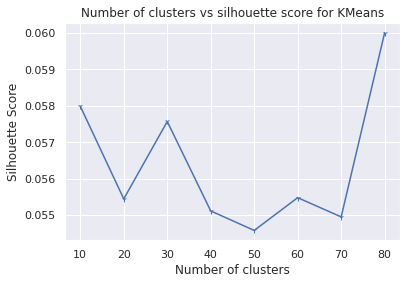

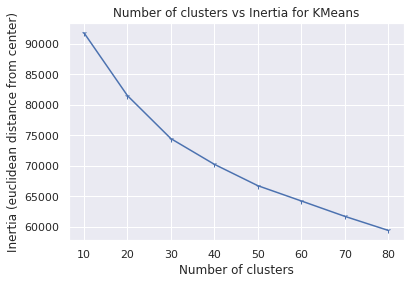

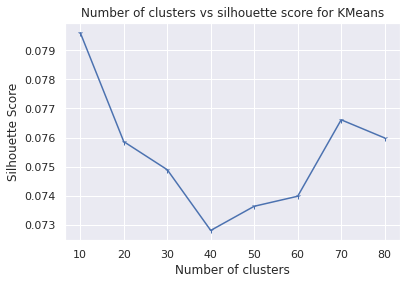

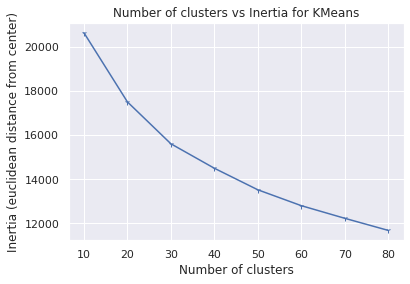

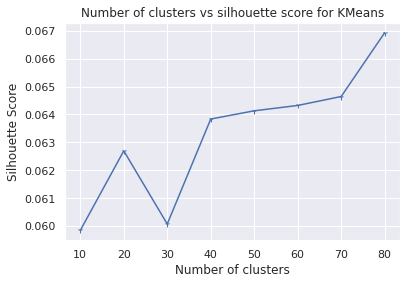

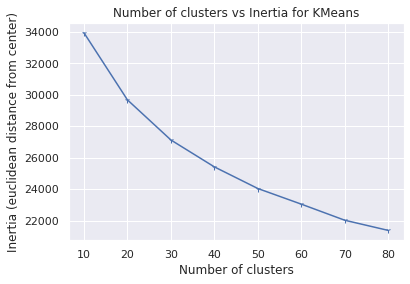

In [25]:
from sklearn.cluster import OPTICS, KMeans
from sklearn.metrics import silhouette_score

datasets = [("scaled train", scaled_train), 
            ("f regression", f_regression_select), 
            ("mutual information regression", mutual_info_regression_select)]
clusters = range(10, 81, 10)
for dataset_name, dataset in datasets:
    scores = []
    inertia = []
    for number_of_clusters in clusters:
        kmeans = KMeans(n_clusters=number_of_clusters)
        labels = kmeans.fit_predict(dataset)
        inertia.append(kmeans.inertia_)
        scores.append(silhouette_score(dataset, labels))
    plt.plot(clusters, scores, marker='1')
    plt.title(f"Number of clusters vs silhouette score for KMeans")
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.show()
    plt.plot(clusters, inertia, marker='1')
    plt.title(f"Number of clusters vs Inertia for KMeans")
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia (euclidean distance from center)")
    plt.show()
    
        

# Clustering Evaluation
## KMeans
A silhouette score close to 1 is best--they are within the range of \[-1, 1\]. All of the clustering has low silhouette scores, suggesting the clustering is poor. Inertia (loss) starts leveling off, suggesting add more clusters won't improve clustering.